In [1]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
sns.set()
results = results[results.seed_size == 20]
results.head()

,network_name,threshold,seed_size,budget_total,0_no_block,1_no_block,2_no_block,3_no_block,0_cbh,1_cbh,2_cbh,3_cbh,0_degree,1_degree,2_degree,3_degree,total_no_block,total_cbh,total_degree
39,fb-pages-politician,2,20,29,889.0,0.0,0.0,5019.0,912.3,5.8,4.2,4985.7,962.2,21.3,21.2,4903.3,4999.0,4975.7,4925.8
40,fb-pages-politician,2,20,59,889.0,0.0,0.0,5019.0,934.7,4.8,11.7,4956.8,1031.0,33.5,13.1,4830.4,4999.0,4953.3,4857.0
41,fb-pages-politician,2,20,118,889.0,0.0,0.0,5019.0,958.5,29.5,32.7,4887.3,1055.2,71.7,95.3,4685.8,4999.0,4929.5,4832.8
42,fb-pages-politician,2,20,177,889.0,0.0,0.0,5019.0,1035.9,518.5,974.8,3378.8,1204.0,500.2,964.9,3238.9,4999.0,4852.1,4684.0
43,fb-pages-politician,2,20,236,889.0,0.0,0.0,5019.0,1545.0,9.4,1938.8,2414.8,1761.0,16.9,1846.0,2284.1,4999.0,4343.0,4127.0


In [2]:
for i in range(results.shape[0]):
    if results.iloc[i,0] == "astroph":
        results.iloc[i, 3] /= 18771
        for j in range(results.shape[1] - 3, results.shape[1]):
            results.iloc[i,j] /= 18771
    elif results.iloc[i,0] == "fb-pages-politician":
        results.iloc[i, 3] /= 5908
        for j in range(results.shape[1] - 3, results.shape[1]):
            results.iloc[i,j] /= 5908
    elif results.iloc[i,0] == "wiki":
        results.iloc[i, 3] /= 7066
        for j in range(results.shape[1] - 3, results.shape[1]):
            results.iloc[i,j] /= 7066
    

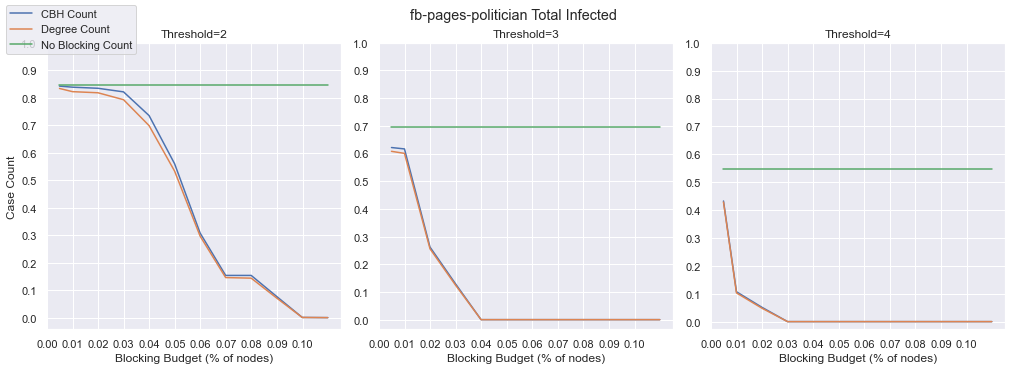

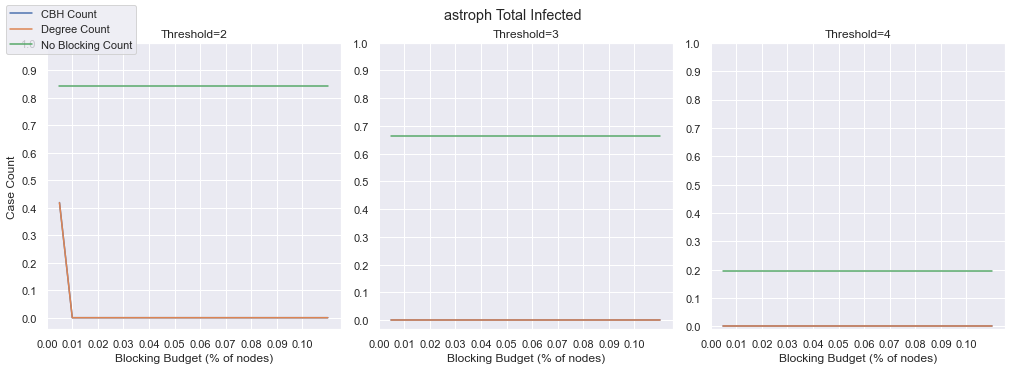

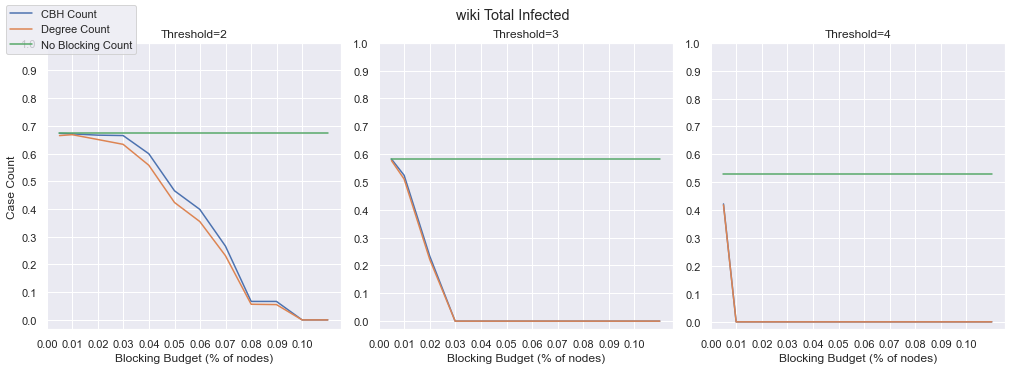

In [3]:
import matplotlib.pyplot as plt
import numpy as np
names = ['fb-pages-politician','astroph', 'wiki']
thres = [2, 3, 4]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
#        threshold = threshold[threshold.seed_size == 10]
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks(np.arange(0, .11, .01))
        ax[i].set_yticks(np.arange(0, 1.1, .1))
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"], loc='upper left')
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget (% of nodes)")
        ax[i].set_title("Threshold=" + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf", bbox_inches="tight")

In [29]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh']]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh,budget_total
117,0.841298,2,0.837126,0.670918,1.406115e-11
118,0.841298,2,0.833461,0.249161,2.827349e-11
119,0.841298,2,0.826520,0.000000,5.669817e-11
120,0.841298,2,0.818662,0.000000,8.512285e-11
121,0.841298,2,0.810596,0.000000,1.133963e-10
122,0.841298,2,0.803037,0.000000,1.418210e-10
123,0.841298,2,0.794715,0.000000,1.702457e-10
124,0.841298,2,0.786900,0.000000,1.985192e-10
125,0.841298,2,0.779394,0.000000,2.269439e-10
126,0.841298,2,0.771989,0.000000,2.553686e-10
